# 09A — Filtros lineales **en color** (Media y Gaussiano)

> OpenCV aplica `blur` y `GaussianBlur` a **cada canal** de forma independiente si la imagen es multi‑canal.


## Carga de imagen (color)
Usaremos la misma ruta de los notebooks previos. Cambia `IMG_PATH` si tu estructura difiere.


Imagen cargada (RGB): (512, 512, 3) uint8


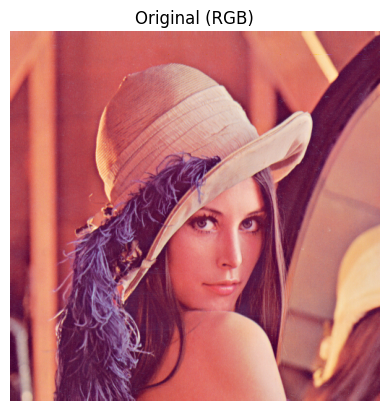

In [7]:
# ✅ Importar librerías y cargar imagen en color
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png"  # ← Ajusta si es necesario

img_bgr = cv2.imread(IMG_PATH)
if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica IMG_PATH.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print("Imagen cargada (RGB):", img_rgb.shape, img_rgb.dtype)

plt.imshow(img_rgb); plt.title("Original (RGB)"); plt.axis("off"); plt.show()


## Filtro de **Media** (Box) en color

`cv2.blur` opera canal‑a‑canal cuando recibe una imagen multi‑canal. Probamos kernels 3×3 y 7×7.


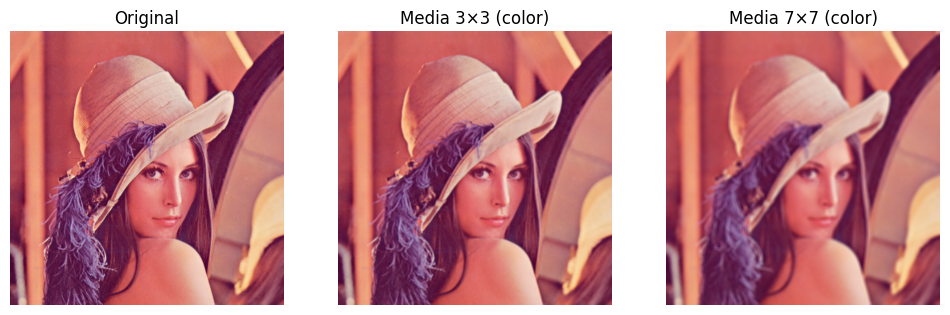

In [8]:
blur3 = cv2.blur(img_rgb, (3,3))
blur7 = cv2.blur(img_rgb, (7,7))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(blur3);   plt.title("Media 3×3 (color)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(blur7);   plt.title("Media 7×7 (color)"); plt.axis("off")
plt.show()


## Filtro **Gaussiano** en color

`cv2.GaussianBlur` también aplica la convolución **independiente por canal**. Usaremos σ=1.0 y σ=2.0.


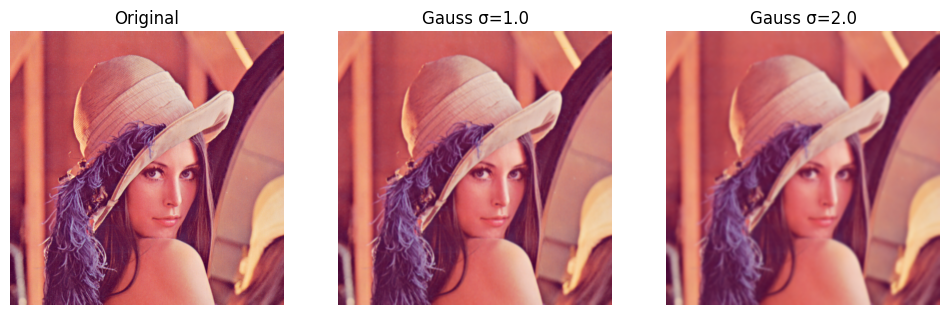

In [9]:
gauss1 = cv2.GaussianBlur(img_rgb, (0,0), sigmaX=1.0)
gauss2 = cv2.GaussianBlur(img_rgb, (0,0), sigmaX=2.0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb);  plt.title("Original");      plt.axis("off")
plt.subplot(1,3,2); plt.imshow(gauss1);   plt.title("Gauss σ=1.0");   plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gauss2);   plt.title("Gauss σ=2.0");   plt.axis("off")
plt.show()


## ¿Filtrar por canales manualmente vs. filtrar la imagen completa?

OpenCV ya procesa por canal si la imagen es multi‑canal. Aun así, comparamos resultados al **separar y filtrar** cada canal manualmente y luego **recomponer**, frente a aplicar el filtro directamente.


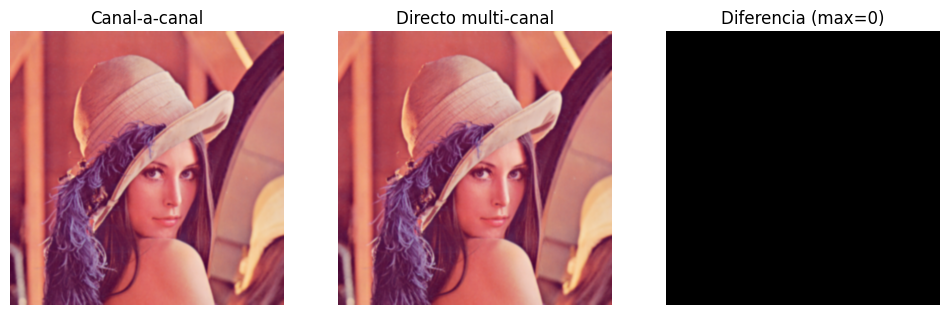

In [10]:
# Separar canales y filtrar manualmente (ejemplo con Gauss σ=1.2)
r, g, b = cv2.split(img_rgb)
r2 = cv2.GaussianBlur(r, (0,0), 1.2)
g2 = cv2.GaussianBlur(g, (0,0), 1.2)
b2 = cv2.GaussianBlur(b, (0,0), 1.2)
gauss_channels = cv2.merge([r2, g2, b2])

# Filtrar directamente
gauss_direct = cv2.GaussianBlur(img_rgb, (0,0), 1.2)

# ¿Son equivalentes numéricamente?
diff = cv2.absdiff(gauss_channels, gauss_direct)
max_diff = diff.max()

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gauss_channels); plt.title("Canal‑a‑canal"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(gauss_direct);   plt.title("Directo multi‑canal"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(diff);           plt.title(f"Diferencia (max={int(max_diff)})"); plt.axis("off")
plt.show()


## Bordes y espacios de color




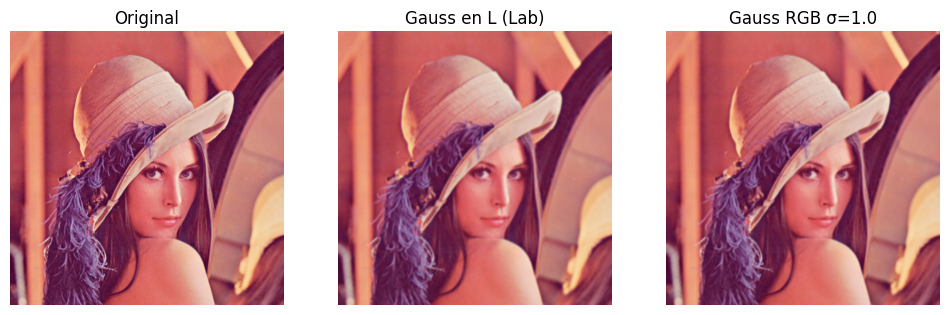

In [11]:
# Ejemplo: filtrar componente L en Lab y recomponer
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
L, A, B = cv2.split(img_lab)

L_suave = cv2.GaussianBlur(L, (0,0), 1.2)  # suaviza luminancia
img_lab_s = cv2.merge([L_suave, A, B])
img_rgb_lab = cv2.cvtColor(img_lab_s, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb);     plt.title("Original");         plt.axis("off")
plt.subplot(1,3,2); plt.imshow(img_rgb_lab); plt.title("Gauss en L (Lab)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gauss1);      plt.title("Gauss RGB σ=1.0");  plt.axis("off")
plt.show()


## Notas prácticas para robótica

- **Tiempo real**: preferir **Gaussiano** separable (rápido) y kernels pequeños.  
- **Segmentación por color**: filtrar en color antes de umbralizar reduce ruido; considera filtrar solo la **luminancia** (Lab) para no deslavar los colores.  
- **Estabilidad de *features***: un Gaussiano suave ayuda a estabilizar puntos de interés (ORB/SIFT) en escenas coloridas.  
- **Cámaras embebidas**: usar resoluciones menores y filtrar en **Y** (YCrCb) si el cómputo es limitado.  
